In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import datetime
import math


In [2]:
# Creating histogram using matplotlib
def createHistUsingPlt(df_column, n_bins, xlabel, ylabel, title, legend, watermarktext):
    fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
    # Remove axes splines  
    for s in ['top', 'bottom', 'left', 'right']:  
        axs.spines[s].set_visible(False)
    
    # Remove x, y ticks 
    axs.xaxis.set_ticks_position('none')  
    axs.yaxis.set_ticks_position('none')  

    # Add padding between axes and labels  
    axs.xaxis.set_tick_params(pad = 5)  
    axs.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines  
    axs.grid(b = True, color ='grey',  
            linestyle ='-.', linewidth = 0.5,  
            alpha = 0.6)  

    # Add Text watermark  
    fig.text(0.9, 0.15, watermarktext,  
             fontsize = 12,  
             color ='red', 
             ha ='left', 
             va ='top',  
             alpha = 0.7)

    data = np.array(df_column)

    N, bins, patches = plt.hist(data, bins = n_bins)

    # Setting color 
    fracs = ((N**(1 / 5)) / N.max()) 
    norm = colors.Normalize(fracs.min(), fracs.max()) 

    for thisfrac, thispatch in zip(fracs, patches): 
        color = plt.cm.viridis(norm(thisfrac)) 
        thispatch.set_facecolor(color) 

    # Adding extra features     
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel)
    plt.legend(legend) 
    plt.title(title) 

    # Show plot 
    plt.show()
    

In [3]:
#Columns having null or blank values
def columnNamessHavingNull(df):
    colshavingnull = []
    cols = df.isnull().any().to_dict()
    for x in cols:
        if (cols[x]):
            colshavingnull.append(x)
    return colshavingnull

In [4]:
def columnDetailsHaivngNull(colshavingnull):
    total = 0
    details_nullcolumns = {}
    for col in colshavingnull:
        col_count_null = np.where(pd.isnull(df[col]))
        details_nullcolumns[col] =  len(col_count_null[0])
#         print(f"{col}-----{len(col_count_null[0])}")
        total = total + len(col_count_null[0])
#     print("\n")
#     print(f"Total records are: {total}" )
    details_nullcolumns["Total"] = total
    return details_nullcolumns
        

In [5]:
df = pd.read_csv('../Practice/DATA/lending_club_loan_two.csv')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
#columns having NULL values
columns_having_null = columnNamessHavingNull(df)
pd.DataFrame(columns_having_null)

,0
0,emp_title
1,emp_length
2,title
3,revol_util
4,mort_acc
5,pub_rec_bankruptcies


In [10]:
details_nullcolumns = columnDetailsHaivngNull(columns_having_null)
pd.DataFrame.from_dict([details_nullcolumns])

,emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies,Total
0,22927,18301,1755,276,37795,535,81589


In [11]:
#Drop Emp_Title as it is not required
df = df.drop(["emp_title"], axis=1)

In [12]:
columns_having_null = columnNamessHavingNull(df)
pd.DataFrame(columns_having_null)

,0
0,emp_length
1,title
2,revol_util
3,mort_acc
4,pub_rec_bankruptcies


In [13]:
details_nullcolumns = columnDetailsHaivngNull(columns_having_null)
pd.DataFrame.from_dict([details_nullcolumns])

,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies,Total
0,18301,1755,276,37795,535,58662


In [14]:
#Convert 36 months / 60 months to numeric value
df["term"] = df["term"].str.strip()
df["term"] = df["term"].str.split(" ", n = 2, expand = True)

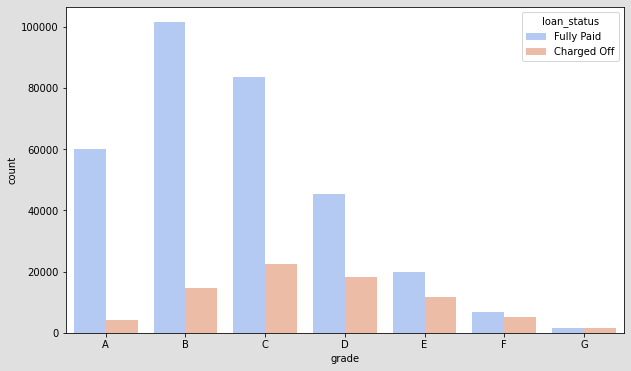

In [15]:
# Loan Amount vs Loan Status
plt.figure(figsize=(10,6), facecolor="#E0E0E0")
sns.countplot(x='grade', data=df, hue="loan_status", order=sorted(df["grade"].unique()), palette="coolwarm")
plt.show()

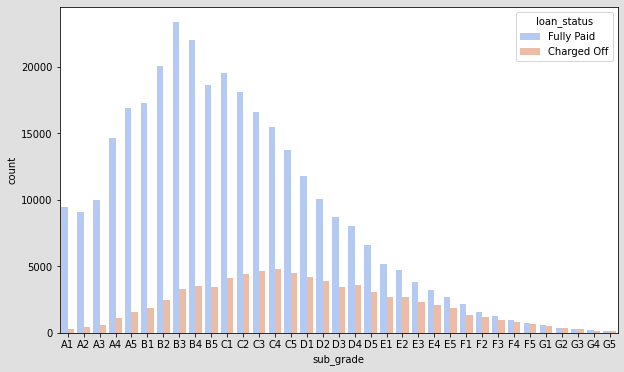

In [16]:
# Loan Amount vs Loan Status
plt.figure(figsize=(10,6), facecolor="#E0E0E0")
sns.countplot(x='sub_grade', data=df, hue="loan_status", order=sorted(df["sub_grade"].unique()), palette="coolwarm")
plt.show()

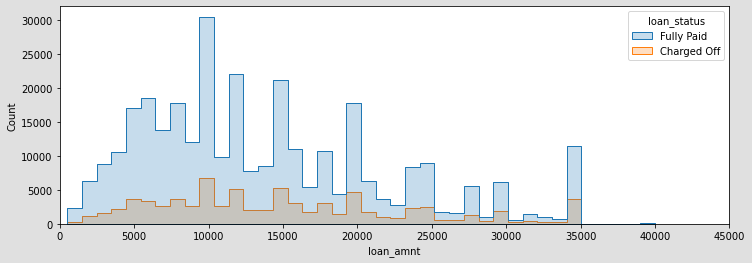

In [17]:
plt.figure(figsize=(12,4), facecolor="#E0E0E0")
sns.histplot(df, x='loan_amnt', kde=False, bins=40, hue='loan_status', element='step')
plt.xlim((0, np.max(df['loan_amnt']) + 5000))
plt.show()

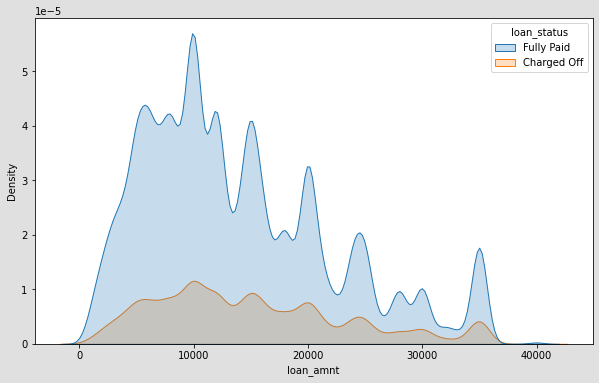

In [18]:
# Loan Amount vs Loan Status
plt.figure(figsize=(10,6), facecolor="#E0E0E0")
sns.kdeplot(data=df, x="loan_amnt", hue="loan_status", shade="1")
plt.show()

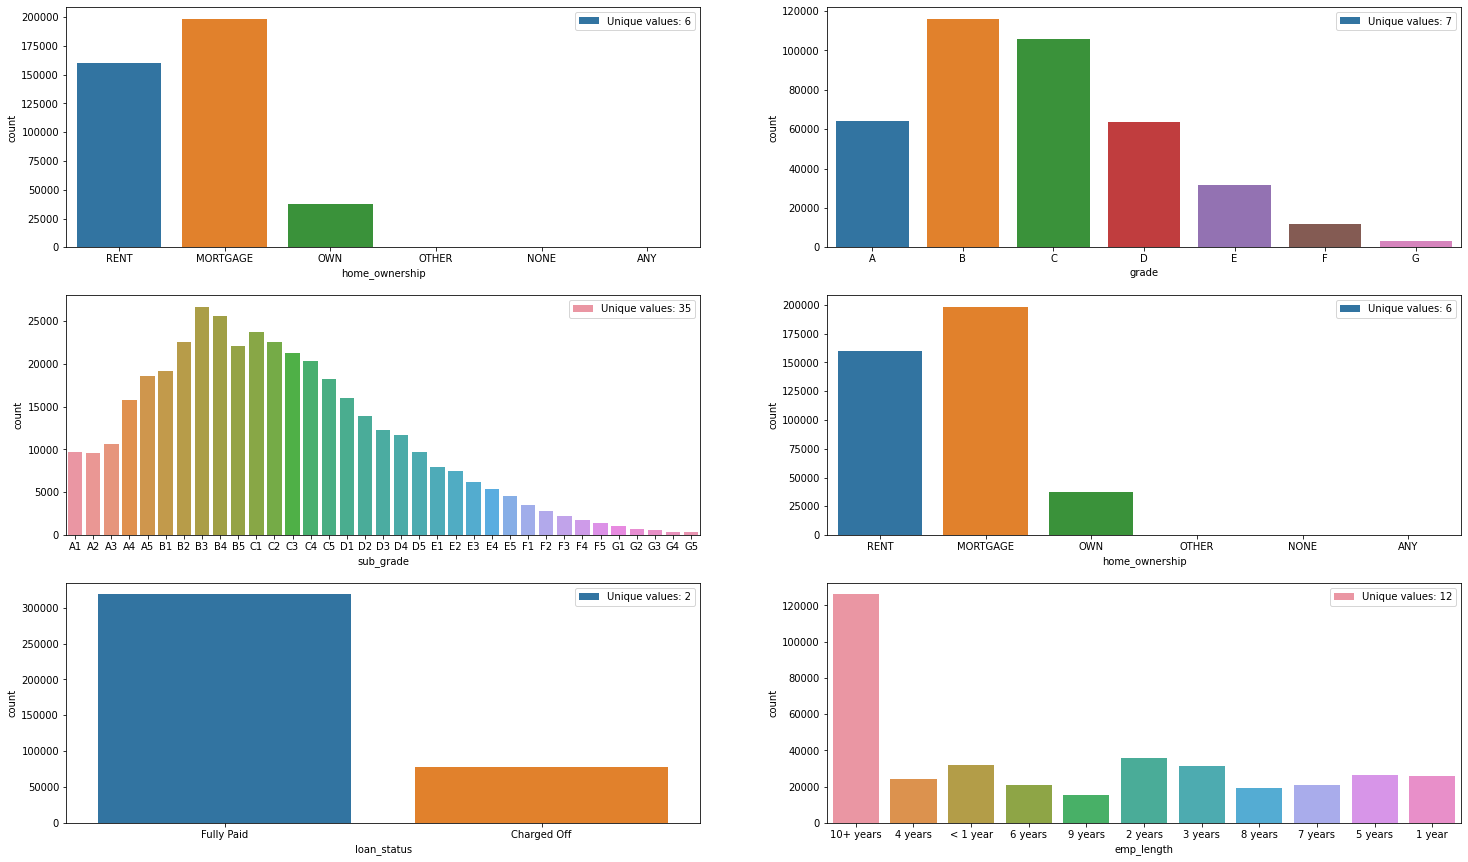

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15))

sns.countplot(x='home_ownership', data=df, ax=axs[0,0])
l = len(df["home_ownership"].unique())
temp = f"Unique values: {l}"
axs[0,0].legend([temp])

sns.countplot(x='grade', order=sorted(df["grade"].unique()), data=df, ax=axs[0,1])
l = len(df["grade"].unique())
temp = f"Unique values: {l}"
axs[0,1].legend([temp])

sns.countplot(x='sub_grade', order=sorted(df["sub_grade"].unique()), data=df, ax=axs[1,0])
l = len(df["sub_grade"].unique())
temp = f"Unique values: {l}"
axs[1,0].legend([temp])

sns.countplot(x='home_ownership', data=df, ax=axs[1,1])
l = len(df["home_ownership"].unique())
temp = f"Unique values: {l}"
axs[1,1].legend([temp])

sns.countplot(x='loan_status', data=df, ax=axs[2,0])
l = len(df["loan_status"].unique())
temp = f"Unique values: {l}"
axs[2,0].legend([temp])

sns.countplot(x='emp_length', data=df, ax=axs[2,1])
l = len(df["emp_length"].unique())
temp = f"Unique values: {l}"
axs[2,1].legend([temp])

plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

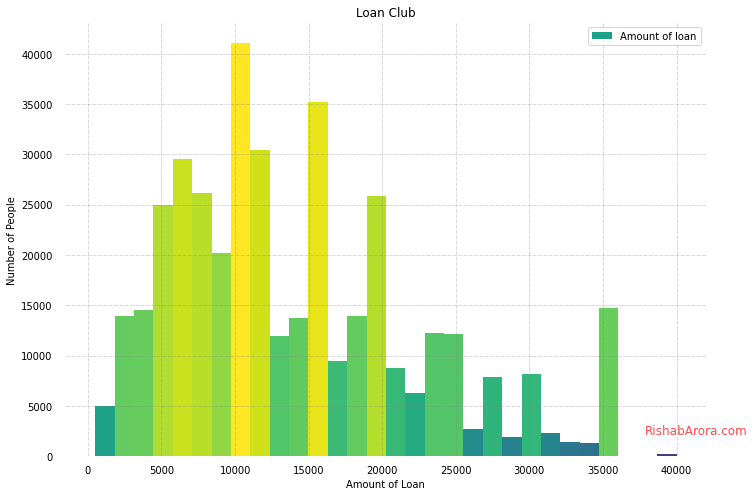

In [21]:
createHistUsingPlt(df["loan_amnt"], 30, "Amount of Loan", "Number of People", "Loan Club", ["Amount of loan"], "RishabArora.com")
 

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [24]:
#Change column grade to numeric.
df["grade"]= label_encoder.fit_transform(df["grade"])

In [25]:
#Drop sub grade. Grade and subgrade are forming the similar chart. sub grade has 37 categories. So dropping it
df = df.drop("sub_grade", axis=1)

In [26]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,1,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,1,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,1,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,0,6 years,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,2,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


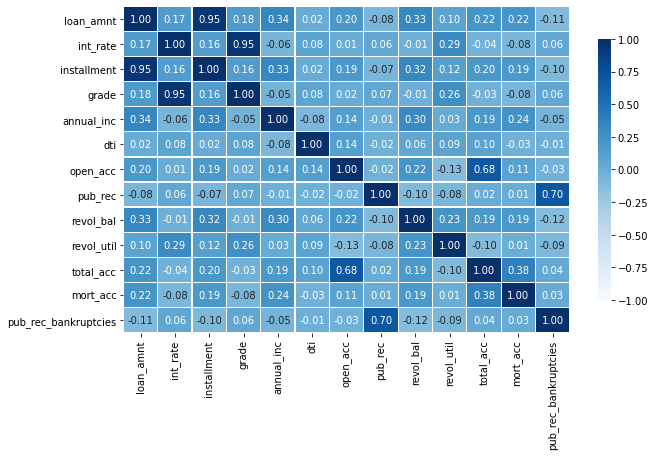

In [27]:
# correlation heat map
plt.figure(figsize=(10, 6))
df_corr = df.corr()

# min -1 and max +1 as we are plotting correlation
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f", vmin= -1.0, vmax=1.0,
           linewidth=0.3, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [28]:
sns.__version__

'0.11.1'